In [35]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import ElasticNet
import lightgbm as lgb
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

# Carga y preparacion de datos

In [46]:
# Cargar el DataFrame desde el archivo
with open('../Pickles/df_final.pickle', 'rb') as archivo:
    df = pickle.load(archivo)

In [47]:
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [48]:
nombres=df.drop(['CompTotal'], axis=1).columns

In [49]:
df.isnull().values.any()

False

In [ ]:
# y = df[['CompTotal']].copy()  # 'y' ahora contiene la variable objetivo

# # Escalar los datos (en este caso, solo la columna de salarios)
# scaler = StandardScaler()
# y_scaled = scaler.fit_transform(y) # 'y_scaled' contiene los salarios escalados

# # Aplicar K-Means con 2 clústeres
# kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
# kmeans.fit(y_scaled)

# # Obtener las etiquetas de los clústeres
# labels = kmeans.labels_

# # Agregar las etiquetas al DataFrame original
# df['cluster'] = labels

# # Separar los grupos
# df_cluster_0 = df[df['cluster'] == 0]
# df_cluster_1 = df[df['cluster'] == 1]
# df_cluster_2 = df[df['cluster'] == 2]
# df_cluster_3 = df[df['cluster'] == 3]

C:\Users\emita\AppData\Local\Temp\ipykernel_24300\2445942144.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = labels


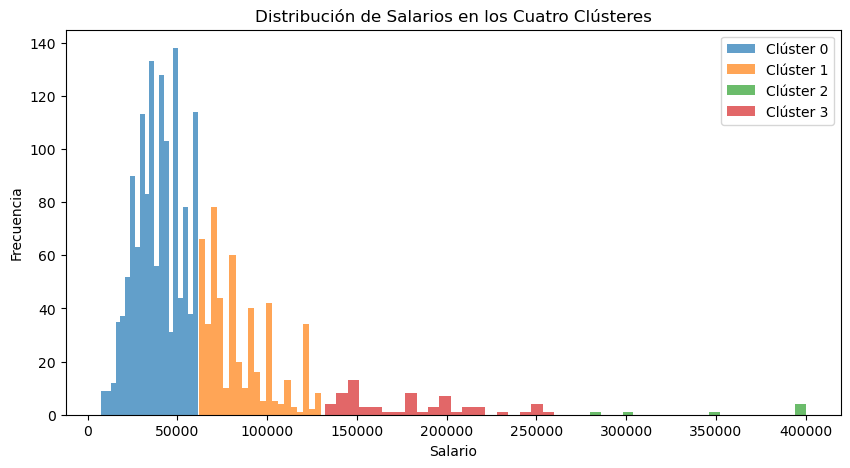

In [ ]:
# # Histograma de los dos grupos
# plt.figure(figsize=(10, 5))
# plt.hist(df_cluster_0['CompTotal'], bins=20, alpha=0.7, label='Clúster 0')
# plt.hist(df_cluster_1['CompTotal'], bins=20, alpha=0.7, label='Clúster 1')
# plt.hist(df_cluster_2['CompTotal'], bins=20, alpha=0.7, label='Clúster 2')
# plt.hist(df_cluster_3['CompTotal'], bins=20, alpha=0.7, label='Clúster 3')
# plt.xlabel("Salario")
# plt.ylabel("Frecuencia")
# plt.title("Distribución de Salarios en los Cuatro Clústeres")
# plt.legend()
# plt.show()

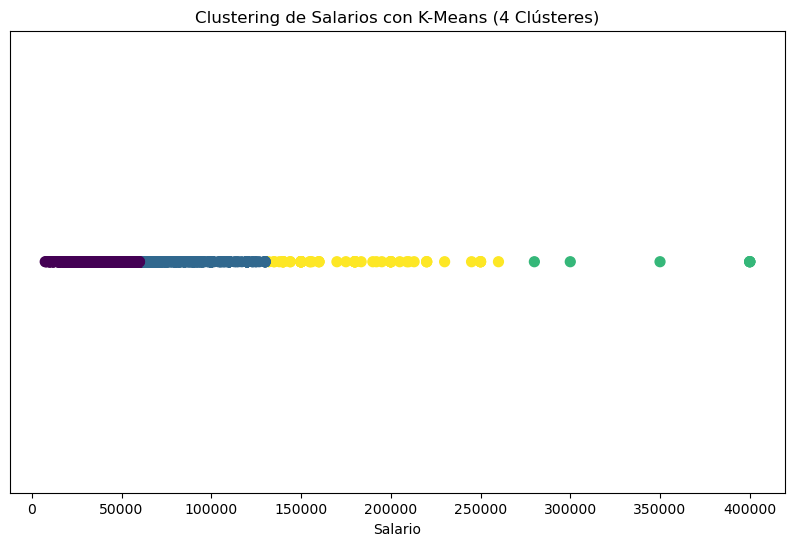

In [ ]:
# # Visualizar los clústeres
# plt.figure(figsize=(10, 6))
# plt.scatter(df['CompTotal'], [0] * len(df), c=df['cluster'], cmap='viridis', s=50)
# plt.xlabel("Salario")
# plt.title("Clustering de Salarios con K-Means (4 Clústeres)")
# plt.yticks([])  # Ocultar el eje y
# plt.show()

In [ ]:
# # --- Agrupar clústeres 1, 2 y 3 ---
# df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})

# # Separar los grupos
# df_cluster_0 = df[df['cluster_grouped'] == 0]
# df_cluster_1 = df[df['cluster_grouped'] == 1]

C:\Users\emita\AppData\Local\Temp\ipykernel_24300\1501326124.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})


In [24]:
# from sklearn.preprocessing import PolynomialFeatures
# # --- Clúster 0 ---
# # Separar la variable objetivo (y) de las variables predictoras (X)
# y_c0 = df_cluster_0['CompTotal']
# X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped'], axis=1)  # Eliminar también las columnas de clustering

In [25]:
# y_c0.describe()

count     1366.000000
mean     39109.101757
std      12611.945574
min       7500.000000
25%      30000.000000
50%      39000.000000
75%      50000.000000
max      61200.000000
Name: CompTotal, dtype: float64

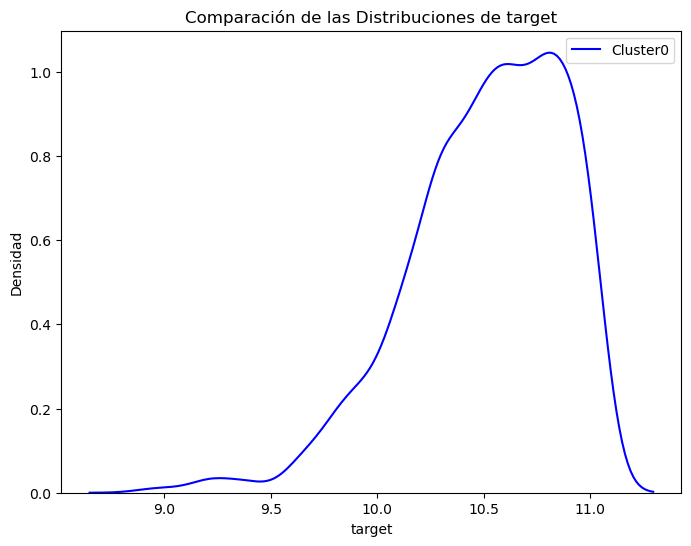

In [ ]:
# # Dividir en entrenamiento y prueba
# X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
#     X_c0, y_c0, test_size=0.2, random_state=42
# )

# # Transformación logarítmica de la variable objetivo
# y_train_c0_log = np.log1p(y_train_c0)

# # Visualizacion con transformacion logaritmica
# # Visualización
# plt.figure(figsize=(8, 6))
# sns.kdeplot(y_train_c0_log, label='Cluster0', color='blue')
# plt.title('Comparación de las Distribuciones de target')
# plt.xlabel('target')
# plt.ylabel('Densidad')
# plt.legend()
# plt.show()

In [27]:
# # Creacion de variables polinomicas
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_train_c0_poly = poly.fit_transform(X_train_c0)
# X_test_c0_poly = poly.transform(X_test_c0)

# # Escalar las variables predictoras
# scaler_c0 = StandardScaler()
# X_train_c0_scaled = scaler_c0.fit_transform(X_train_c0_poly)
# X_test_c0_scaled = scaler_c0.transform(X_test_c0_poly)

In [28]:
# print((X_train_c0).shape)
# print((X_test_c0).shape)
# print((y_train_c0).shape)
# print((y_test_c0).shape)

(1092, 396)
(274, 396)
(1092,)
(274,)


In [51]:
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Reemplazar todos los NaN con 0
df.fillna(0, inplace=True)

y = df[['CompTotal']].copy()  # 'y' ahora contiene la variable objetivo

# Escalar los datos (en este caso, solo la columna de salarios)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)  # 'y_scaled' contiene los salarios escalados

# Aplicar K-Means con 4 clústeres
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(y_scaled)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df['cluster'] = labels

# Separar los grupos
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_2 = df[df['cluster'] == 2]
df_cluster_3 = df[df['cluster'] == 3]

# --- Agrupar clústeres 1, 2 y 3 ---
df['cluster_grouped'] = df['cluster'].map({0: 0, 1: 1, 2: 1, 3: 1})

# Separar los grupos
df_cluster_0 = df[df['cluster_grouped'] == 0]
df_cluster_1 = df[df['cluster_grouped'] == 1]

y_c0 = df_cluster_0['CompTotal']
X_c0 = df_cluster_0.drop(['CompTotal', 'cluster', 'cluster_grouped'], axis=1)

# Dividir en entrenamiento y prueba
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(
    X_c0, y_c0, test_size=0.2, random_state=42
)

# Escalar las variables predictoras
scaler_c0 = MinMaxScaler()
X_train = scaler_c0.fit_transform(X_train_c0)
X_test = scaler_c0.transform(X_test_c0)  # Cambiar 'y_test_c0' por 'X_test_c0'

# Transformación logarítmica de la variable objetivo (esto permanece igual)
y_train_c0_log = np.log1p(y_train_c0)

In [52]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Asegúrate de convertir los arrays de numpy a pandas DataFrame y Series si es necesario
X_train = pd.DataFrame(X_train)  # Si X_train es un ndarray, conviértelo en DataFrame
y_train = pd.Series(y_train_c0_log)  # Si y_train es un ndarray, conviértelo en Series

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

cv = 5  # Número de folds

# Inicializamos listas para guardar las métricas de cada fold
r2_scores = []
mse_scores = []
mae_scores = []

# Realizar la validación cruzada
kf = KFold(n_splits=cv, shuffle=True, random_state=42)
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]  # Usar .iloc con DataFrame
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Usar .iloc con Series
    
    # Entrenar el modelo en el fold
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Predecir en el conjunto de validación
    y_val_pred_log = rf_model.predict(X_val_fold)
    
    # Revertir la transformación logarítmica
    y_val_pred = np.expm1(y_val_pred_log)
    y_val_actual = np.expm1(y_val_fold)
    
    # Calcular las métricas para este fold
    r2 = r2_score(y_val_actual, y_val_pred)
    mse = mean_squared_error(y_val_actual, y_val_pred)
    mae = mean_absolute_error(y_val_actual, y_val_pred)
    
    # Guardar las métricas en las listas
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Promedios de métricas en CV
mean_r2_cv = np.mean(r2_scores)
mean_mse_cv = np.mean(mse_scores)
mean_rmse_cv = np.sqrt(mean_mse_cv)
mean_mae_cv = np.mean(mae_scores)

# Métricas de Cross-Validation
print("=== Métricas de Cross-Validation ===")
print(f"R² (promedio CV): {mean_r2_cv:.4f}")
print(f"MSE (promedio CV): {mean_mse_cv:.4f}")
print(f"RMSE (promedio CV): {mean_rmse_cv:.4f}")
print(f"MAE (promedio CV): {mean_mae_cv:.4f}")

=== Métricas de Cross-Validation ===
R² (promedio CV): 0.5393
MSE (promedio CV): 72709424.4509
RMSE (promedio CV): 8526.9821
MAE (promedio CV): 6366.0835
